In [2]:
# code 3-1 IMDB 데이터셋 로드하기
from keras.datasets import imdb
(train_data,train_labels),(test_data,test_labels) = imdb.load_data(num_words=10000)

In [3]:
#code 3-2 정수 시퀀스를 이진 행렬로 인코딩하기
import numpy as np
def vectorize_sequences(sequences,dimension=10000):
    results = np.zeros((len(sequences),dimension))
    for i,sequence in enumerate(sequences):
        results[i,sequence]=1.
    return results

x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)

In [4]:
y_train = np.asarray(train_labels).astype('float32')
y_test = np.asarray(test_labels).astype('float32')

In [5]:
#code 3-3 모델 정의하기
from keras import models
from keras import layers

model = models.Sequential()
model.add(layers.Dense(16,activation='relu',input_shape=(10000,)))
model.add(layers.Dense(16,activation='relu'))
model.add(layers.Dense(1,activation='sigmoid'))

Metal device set to: Apple M1 Pro

systemMemory: 16.00 GB
maxCacheSize: 5.33 GB



2022-07-18 10:18:12.619279: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:305] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2022-07-18 10:18:12.619440: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:271] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


In [6]:
#code 3-4 모델 컴파일하기
model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [7]:
#code 3-5 옵티마이저 설정하기
from keras import optimizers

model.compile(optimizer=optimizers.RMSprop(learning_rate=0.001),
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [8]:
#code 3-6 손실과 측정을 함수 객체로 저장하기
from keras import losses
from keras import metrics

model.compile(optimizer=optimizers.RMSprop(learning_rate=0.001),
              loss=losses.binary_crossentropy,
              metrics=[metrics.binary_crossentropy])

In [9]:
#code 3-7 검증 세트 준비하기
x_val = x_train[:10000]
partial_x_train = x_train[10000:]
y_val = y_train[:10000]
partial_y_train = y_train[10000:]

In [10]:
#code3-8 모델 훈련하기
model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['acc'])
history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val,y_val))

Epoch 1/20


2022-07-18 10:18:13.477082: W tensorflow/core/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz
2022-07-18 10:18:13.729190: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


30/30 [==============================] - 2s 38ms/step - loss: 0.5248 - acc: 0.7884 - val_loss: 0.3998 - val_acc: 0.8659
Epoch 2/20
 1/30 [>.............................] - ETA: 0s - loss: 0.3680 - acc: 0.8809

2022-07-18 10:18:14.918412: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


30/30 [==============================] - 0s 15ms/step - loss: 0.3137 - acc: 0.9019 - val_loss: 0.3044 - val_acc: 0.8903
Epoch 3/20
30/30 [==============================] - 0s 14ms/step - loss: 0.2266 - acc: 0.9265 - val_loss: 0.2943 - val_acc: 0.8840
Epoch 4/20
30/30 [==============================] - 0s 14ms/step - loss: 0.1800 - acc: 0.9442 - val_loss: 0.2742 - val_acc: 0.8896
Epoch 5/20
30/30 [==============================] - 0s 13ms/step - loss: 0.1503 - acc: 0.9516 - val_loss: 0.2890 - val_acc: 0.8853
Epoch 6/20
30/30 [==============================] - 0s 13ms/step - loss: 0.1232 - acc: 0.9630 - val_loss: 0.2904 - val_acc: 0.8853
Epoch 7/20
30/30 [==============================] - 0s 13ms/step - loss: 0.1037 - acc: 0.9705 - val_loss: 0.3010 - val_acc: 0.8845
Epoch 8/20
30/30 [==============================] - 0s 12ms/step - loss: 0.0845 - acc: 0.9768 - val_loss: 0.3243 - val_acc: 0.8831
Epoch 9/20
30/30 [==============================] - 0s 13ms/step - loss: 0.0702 - acc: 0.9817 

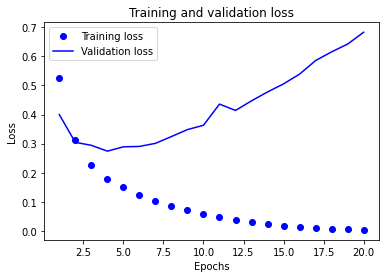

In [11]:
#code 3-9 훈련과 검증 손실 그리기
import matplotlib.pyplot as plt

history_dict = history.history
loss = history_dict['loss']
val_loss = history_dict['val_loss']

epochs=range(1,len(loss)+1)

plt.plot(epochs,loss,'bo',label='Training loss')
plt.plot(epochs,val_loss,'b',label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

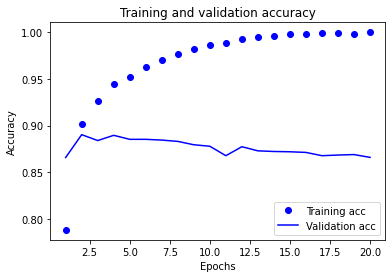

In [12]:
#code 3-10 훈련과 검증 정확도 그리기
plt.clf()

acc = history_dict['acc']
val_acc = history_dict['val_acc']

plt.plot(epochs,acc,'bo',label='Training acc')
plt.plot(epochs,val_acc,'b',label='Validation acc')

plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [13]:
#code3-11 모델 처음부터 다시 훈련하기
model = models.Sequential()
model.add(layers.Dense(16,activation='relu',input_shape=(10000,)))
model.add(layers.Dense(16,activation='relu'))
model.add(layers.Dense(1,activation='sigmoid'))

model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['accuracy'])

model.fit(x_train,y_train,epochs=4,batch_size=512)
results = model.evaluate(x_test,y_test)

Epoch 1/4
 1/49 [..............................] - ETA: 26s - loss: 0.6955 - accuracy: 0.4961

2022-07-18 10:18:24.180889: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


49/49 [==============================] - 1s 10ms/step - loss: 0.4363 - accuracy: 0.8235
Epoch 2/4
49/49 [==============================] - 0s 10ms/step - loss: 0.2493 - accuracy: 0.9126
Epoch 3/4
49/49 [==============================] - 0s 9ms/step - loss: 0.1980 - accuracy: 0.9276
Epoch 4/4
 24/782 [..............................] - ETA: 3s - loss: 0.2817 - accuracy: 0.8932

2022-07-18 10:18:27.340882: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


782/782 [==============================] - 3s 4ms/step - loss: 0.2960 - accuracy: 0.8832
